<html>
    IMPORTING LIBRARIES
</html>

In [21]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

<html>
    IMPORTING FILES
</html>

In [22]:
data = pd.read_csv("C:/Users/Vedhavalli/Desktop/anaconda/anaconda/weight-height data.csv")



In [23]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [24]:
data.shape

(10000, 3)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Height_inches  10000 non-null  float64
 2   Weight_pounds  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [30]:
data = data.rename(columns = ({"Height": "Height_inches"}))
data = data.rename(columns = ({"Weight": "Weight_pounds"}))

In [31]:
data.head()

,Gender,Height_inches,Weight_pounds
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<html>
    VISUALIZATION
</html>

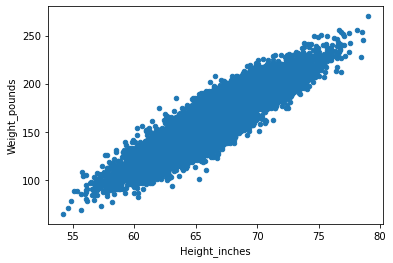

In [33]:
data.plot(kind="scatter",x="Height_inches",y="Weight_pounds");

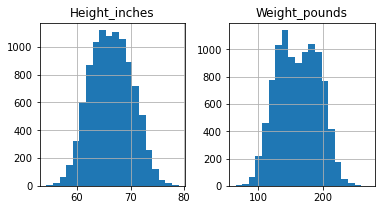

In [34]:
data.hist(figsize=(6,3),bins=20);

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac1a96bc70>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac20cb3820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac20c685e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac20c2b280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac20c2ba30>],
 'means': []}

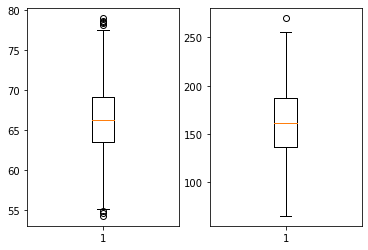

In [35]:
plt.subplot(1,2,1)
plt.boxplot(x=data.Height_inches,data=data)
plt.subplot(1,2,2)
plt.boxplot(x=data.Weight_pounds,data=data)

In [36]:
data.corr()

,Height_inches,Weight_pounds
Height_inches,1.000000,0.924756
Weight_pounds,0.924756,1.000000


In [37]:
Weight = pd.DataFrame(data["Weight_pounds"])
Height = pd.DataFrame(data["Height_inches"])

In [38]:
Height.head()

,Height_inches
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [39]:
Weight.head()

,Weight_pounds
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


<html>
    LINEAR REGRESSION MODEL
</html>

In [40]:
lm= linear_model.LinearRegression()

In [41]:
lm1 =linear_model.LinearRegression(fit_intercept=False)

In [42]:
model = lm.fit(Height,Weight)


In [43]:
model1 = lm1.fit(Height,Weight)

In [44]:
print(model.coef_)

print(model1.coef_)

[[7.71728764]]
[[2.45021927]]


In [45]:
print(model.intercept_)

print(model1.intercept_)

[-350.73719181]
0.0


<html>
    MODEL
    </html>

In [46]:
print(model.score(Height,Weight))

print(model1.score(Height,Weight))

0.8551742120609958
0.4554870973506978


In [47]:
type(Height)
Weight.iloc[1]


Weight_pounds    162.310473
Name: 1, dtype: float64

<html>
    PREDICTION
</html>

In [48]:
X = [60,54,71,67,70,65,55,50,85]     #considering an outlier value
X = pd.DataFrame(X)
Y = model.predict(X)

In [49]:
Y = pd.DataFrame(Y)
df = pd.concat([X,Y],axis=1,keys=["Sample_Height_inches","Sample_Predicted_Weight_Kg"])
print(df)

  Sample_Height_inches Sample_Predicted_Weight_Kg
                     0                          0
0                   60                 112.300067
1                   54                  65.996341
2                   71                 197.190231
3                   67                 166.321080
4                   70                 189.472943
5                   65                 150.886505
6                   55                  73.713628
7                   50                  35.127190
8                   85                 305.232258


In [50]:
model.predict(Height)

array([[219.16147993],
       [180.07254619],
       [221.19180859],
       ...,
       [142.15047514],
       [182.01991949],
       [127.30437133]])

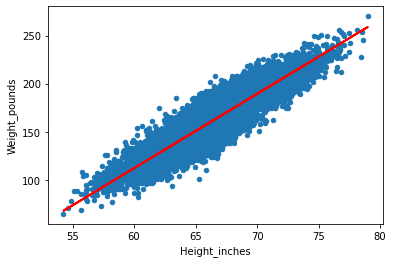

In [52]:
data.plot(kind="scatter",x="Height_inches",y="Weight_pounds");
plt.plot(Height,model.predict(Height),color="red",linewidth=2);

In [60]:
print(model.score(X,Y))  

print(model.score(Height,Weight)) 

1.0
0.8551742120609958
